# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from functools import reduce

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
number = 1
lat = []
temp = []
name = []
lng = []
humidity = []
cloudy = []
wind = []
country = []
date = []
town = []
#cities = ['London']

In [10]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #response.append(city_data)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        name.append(response['name'])
        temp.append(response['main']['temp_max'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        town.append(city)
    
        print(f"Processing Record {number} of Set {len(cities)} complete | Added{city}")
        number +=1
    except:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number += 1
    print("------------------------------\nData Retrieval Complete\n------------------------------")
    #print(results)

#print(json.dumps(response, indent=4, sort_keys=True))

Processing Record 1 of Set 604 complete | Addedmar del plata
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 2 of Set 604 complete | Addeddzilam gonzalez
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 3 of Set 604 complete | Addedalbany
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 4 of Set 604 complete | Addedsaldanha
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 5 of Set 604 complete | Addedeast london
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 6 of Set 604 complete | Addedhermanus
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 7 of Set 604 complete | Addedrikitea
------------------------------
Data Retrieval Complete
-------------------------

Processing Record 59 of Set 604 complete | Addedkavieng
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 60 of Set 604 complete | Addedtiksi
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 61 of Set 604 complete | Addedbajna
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 62 of Set 604 complete | Addedhusavik
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 63 of Set 604 complete | Addedcastro
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 64 of Set 604 complete | Addedvaini
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 65 of Set 604 complete | Addedsaint-jean-port-joli
------------------------------
Data Retrieval Complete
------------------------------


Missing data in city number 117 of 604. | Skipping palabuhanratu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 118 of Set 604 complete | Addedgrand gaube
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 119 of Set 604 complete | Addedcarnarvon
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 120 of Set 604 complete | Addednew norfolk
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 121 of 604. | Skipping toliary
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 122 of Set 604 complete | Addedchirongui
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 123 of Set 604 complete | Addedhambantota
------------------------------
Data Retrieval Complete
-----

Processing Record 174 of Set 604 complete | Addedmandera
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 175 of Set 604 complete | Addedlerwick
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 176 of Set 604 complete | Addedhithadhoo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 177 of Set 604 complete | Addedafua
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 178 of Set 604 complete | Addedximei
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 179 of Set 604 complete | Addednorman wells
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 180 of Set 604 complete | Addedsan carlos de bariloche
------------------------------
Data Retrieval Complete
------------

Processing Record 231 of Set 604 complete | Addeddire dawa
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 232 of Set 604 complete | Addedsaskylakh
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 233 of Set 604 complete | Addedsao felix do xingu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 234 of Set 604 complete | Addedrizhao
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 235 of 604. | Skipping ondorhaan
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 236 of 604. | Skipping vaitupu
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 237 of Set 604 complete | Addedteguldet
------------------------------
Data Retrieval Complete
---------

Processing Record 288 of Set 604 complete | Addedarraial do cabo
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 289 of 604. | Skipping lolua
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 290 of Set 604 complete | Addedglazunovka
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 291 of Set 604 complete | Addedbluff
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 292 of Set 604 complete | Addedguderup
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 293 of 604. | Skipping gorno-chuyskiy
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 294 of Set 604 complete | Addedwyndham
------------------------------
Data Retrieval Complete
------------

Processing Record 345 of Set 604 complete | Addedmargate
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 346 of 604. | Skipping kasra
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 347 of Set 604 complete | Addedboksitogorsk
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 348 of Set 604 complete | Addedilo
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 349 of 604. | Skipping chagda
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 350 of Set 604 complete | Addedtukrah
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 351 of 604. | Skipping halalo
------------------------------
Data Retrieval Complete
----------------------------

Processing Record 402 of Set 604 complete | Addedalamogordo
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 403 of Set 604 complete | Addedmanggar
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 404 of Set 604 complete | Addednetivot
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 405 of Set 604 complete | Addedkey west
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 406 of Set 604 complete | Addedsiguiri
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 407 of Set 604 complete | Addedacapulco
------------------------------
Data Retrieval Complete
------------------------------
Missing data in city number 408 of 604. | Skipping cumaribo
------------------------------
Data Retrieval Complete
----------------------

Processing Record 460 of Set 604 complete | Addedchernyshevskiy
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 461 of Set 604 complete | Addedvao
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 462 of Set 604 complete | Addedevensk
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 463 of Set 604 complete | Addedtimmins
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 464 of Set 604 complete | Addedmastic beach
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 465 of Set 604 complete | Addedbillings
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 466 of Set 604 complete | Addedust-nera
------------------------------
Data Retrieval Complete
---------------------

Processing Record 518 of Set 604 complete | Addedklaksvik
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 519 of Set 604 complete | Addedsantiago del estero
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 520 of Set 604 complete | Addedpacific grove
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 521 of Set 604 complete | Addedxingtai
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 522 of Set 604 complete | Addedzaozerne
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 523 of Set 604 complete | Addedrichards bay
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 524 of Set 604 complete | Addedhuarmey
------------------------------
Data Retrieval Complete
-----

Processing Record 576 of Set 604 complete | Addeddong xoai
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 577 of Set 604 complete | Addedguatire
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 578 of Set 604 complete | Addedclyde river
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 579 of Set 604 complete | Addedkushiro
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 580 of Set 604 complete | Addedmkushi
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 581 of Set 604 complete | Addedmackay
------------------------------
Data Retrieval Complete
------------------------------
Processing Record 582 of Set 604 complete | Addedtabou
------------------------------
Data Retrieval Complete
----------------------------

In [11]:
try:
    weather_dict = {
        "City": town,
        "Lat": lat,
        'Lng': lng, 
        'Max Temp': temp, "Humidity": humidity,
       'Cloudiness': cloudy, 'Wind Speed': wind, 'Country': country, 'Date': date    
    }

    
except (KeyError, IndexError, ValueError): 
    print('Not enough information for a reasonable conclusion.')
    
    weather_dict


weather_data_df = pd.DataFrame(weather_dict)
    
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,54.00,76,100,5.82,AR,1592684714
1,dzilam gonzalez,21.28,-88.93,89.01,70,6,5.79,MX,1592685066
2,albany,42.60,-73.97,91.00,42,73,5.10,US,1592684464
3,saldanha,-33.01,17.94,57.20,87,50,4.70,ZA,1592684755
4,east london,-33.02,27.91,68.38,31,0,8.59,ZA,1592684747


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,54.00,76,100,5.82,AR,1592684714
1,dzilam gonzalez,21.28,-88.93,89.01,70,6,5.79,MX,1592685066
2,albany,42.60,-73.97,91.00,42,73,5.10,US,1592684464
3,saldanha,-33.01,17.94,57.20,87,50,4.70,ZA,1592684755
4,east london,-33.02,27.91,68.38,31,0,8.59,ZA,1592684747


In [7]:
weather_data_df.to_csv('Weath_Data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_over_df = weather_data_df.loc[weather_data_df['Humidity'] > 100]
weather_over_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

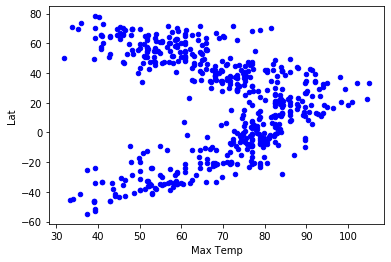

<Figure size 432x288 with 0 Axes>

In [14]:

weather_data_df.plot(kind='scatter',x='Max Temp',y='Lat',color='blue')
plt.show()            
            
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
plt.savefig('../output_data/output.png')

## Latitude vs. Humidity Plot

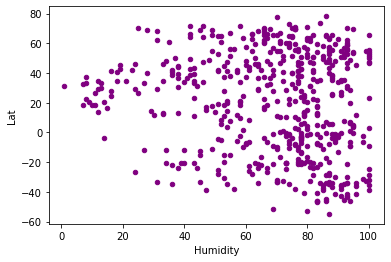

<Figure size 432x288 with 0 Axes>

In [15]:
weather_data_df.plot(kind='scatter',x='Humidity',y='Lat',color='purple')
plt.show() 
plt.savefig('../output_data/humidity.png')

## Latitude vs. Cloudiness Plot

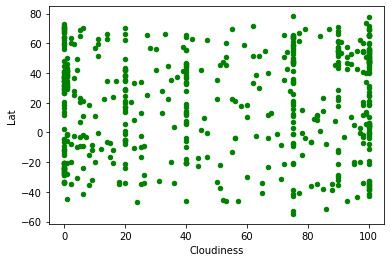

<Figure size 432x288 with 0 Axes>

In [16]:
weather_data_df.plot(kind='scatter',x='Cloudiness',y='Lat',color='green')
plt.show() 
plt.savefig('../output_data/cloudiness.png')

## Latitude vs. Wind Speed Plot

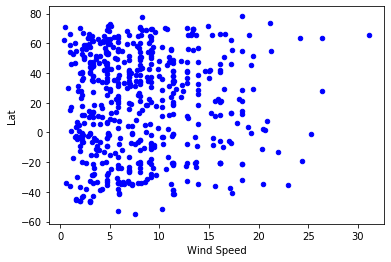

<Figure size 432x288 with 0 Axes>

In [17]:
weather_data_df.plot(kind='scatter',x='Wind Speed',y='Lat',color='blue')
plt.show() 
plt.savefig('../output_data/windspeed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[weather_data_df['Lat'] > 0]
southern_df = weather_data_df.loc[weather_data_df['Lat'] < 0]
northern_df.head()
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,54.00,76,100,5.82,AR,1592684714
3,saldanha,-33.01,17.94,57.20,87,50,4.70,ZA,1592684755
4,east london,-33.02,27.91,68.38,31,0,8.59,ZA,1592684747
5,hermanus,-34.42,19.23,55.99,92,83,11.16,ZA,1592684768
6,rikitea,-23.12,-134.97,76.24,81,67,13.73,PF,1592684748


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

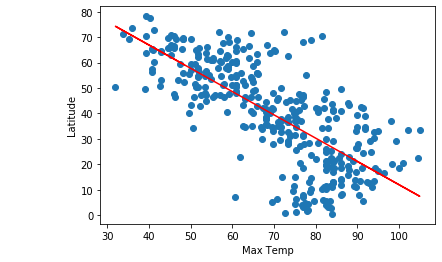

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_df['Max Temp']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

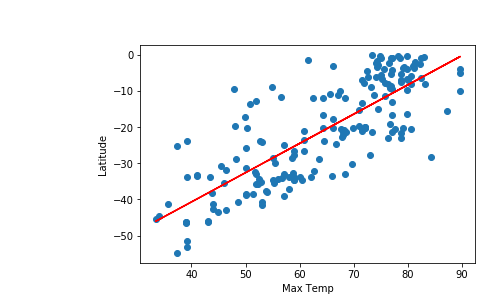

There is very strident results that show the closer to the equator, the hotter it is, for both sides of the equator.
This is, in fact, the clearest proof shown regarding maximum temperatures and positioning on the planet.


<Figure size 432x288 with 0 Axes>

In [27]:
x_values = southern_df['Max Temp']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_temp.png')
print(f'There is very strident results that show the closer to the equator, the hotter it is, for both sides of the equator.')
print(f'This is, in fact, the clearest proof shown regarding maximum temperatures and positioning on the planet.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

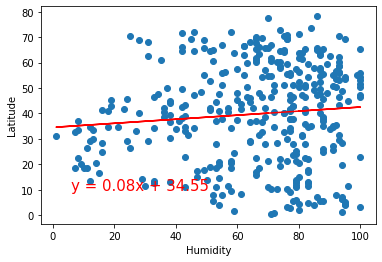

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_df['Humidity']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_humid.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

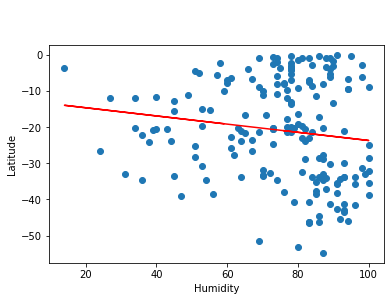

Between the two graphs, there is more humidity at the higher end of the temperature scale.
There does seem to be a slight regression in the humidity for the southern hemisphere, the hotter it gets.
However, the opposite seems true for the northern hemisphere.


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_df['Humidity']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_humid.png')
print(f'Between the two graphs, there is more humidity at the higher end of the temperature scale.')
print(f'There does seem to be a slight regression in the humidity for the southern hemisphere, the hotter it gets.')
print(f'However, the opposite seems true for the northern hemisphere.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

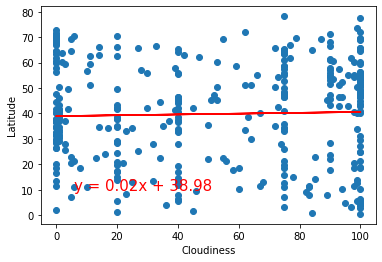

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northern_df['Cloudiness']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

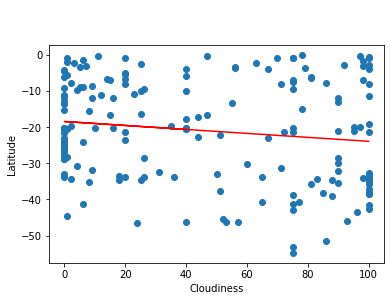

Cloudiness doesn't seems to be affected by whether or not it is in the north or south hemisphere.
The midpoint, for the southerrn hemisphere, seems to be heaviest at -20 degrees, while in the northern hemisphere, it is at 40 degrees.


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southern_df['Cloudiness']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_cloudy.png')
print(f"Cloudiness doesn't seems to be affected by whether or not it is in the north or south hemisphere.")
print(f"The midpoint, for the southerrn hemisphere, seems to be heaviest at -20 degrees, while in the northern hemisphere, it is at 40 degrees.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

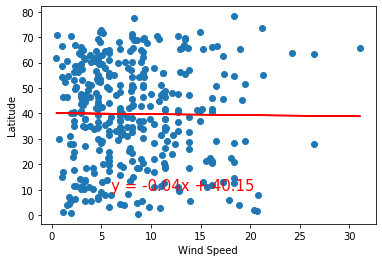

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = northern_df['Wind Speed']
y_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/north_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

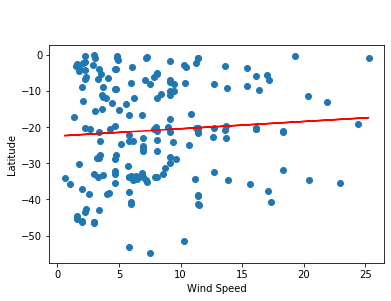

The difference between the Hemispheres, while there is a very slight increase in wind speed north of the equator, there is a more dramatic decrease south of the equator. 
There is also a smaller set of data to choose from in the southern dataframe, which may have skewed the results.


<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southern_df['Wind Speed']
y_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../output_data/south_wind.png')
print(f"The difference between the Hemispheres, while there is a near flat decrease in wind speed north of the equator, there is a more dramatic increase south of the equator. ")
print(f'There is also a smaller set of data to choose from in the southern dataframe, which may have skewed the results.')